In [83]:
import pandas as pd
import numpy as np

In [84]:
df = pd.read_excel('classic_models.xlsx')

In [85]:
#Proyecto classic-models  limpieza de database

In [86]:
df.info

<bound method DataFrame.info of         productLine                                    textDescription  \
0      Classic Cars  Attention car enthusiasts: Make your wildest c...   
1       Motorcycles  Our motorcycles are state of the art replicas ...   
2            Planes  Unique, diecast airplane and helicopter replic...   
3             Ships  The perfect holiday or anniversary gift for ex...   
4            Trains  Model trains are a rewarding hobby for enthusi...   
5  Trucks and Buses  The Truck and Bus models are realistic replica...   
6      Vintage Cars  Our Vintage Car models realistically portray a...   

   htmlDescription  image  
0              NaN    NaN  
1              NaN    NaN  
2              NaN    NaN  
3              NaN    NaN  
4              NaN    NaN  
5              NaN    NaN  
6              NaN    NaN  >

In [87]:
import openpyxl

workbook = openpyxl.load_workbook('classic_models.xlsx')

# Obtiene los nombres de las hojas
sheet_names = workbook.sheetnames

# Muestra los nombres de las hojas
for sheet_name in sheet_names:
    print(sheet_name)



product_lines
payments
orders
orderdetails
offices
products
customers
employees


In [88]:


for sheet_name in excel_file.sheet_names:
    
    df = excel_file.parse(sheet_name)
    
    
    print("Hoja de cálculo:", sheet_name)
    
    # Muestra el contenido de la hoja de cálculo después de la limpieza
    print(df)
    print()  # Línea en blanco para separar las tablas


Hoja de cálculo: product_lines
        productLine                                    textDescription  \
0      Classic Cars  Attention car enthusiasts: Make your wildest c...   
1       Motorcycles  Our motorcycles are state of the art replicas ...   
2            Planes  Unique, diecast airplane and helicopter replic...   
3             Ships  The perfect holiday or anniversary gift for ex...   
4            Trains  Model trains are a rewarding hobby for enthusi...   
5  Trucks and Buses  The Truck and Bus models are realistic replica...   
6      Vintage Cars  Our Vintage Car models realistically portray a...   

   htmlDescription  image  
0              NaN    NaN  
1              NaN    NaN  
2              NaN    NaN  
3              NaN    NaN  
4              NaN    NaN  
5              NaN    NaN  
6              NaN    NaN  

Hoja de cálculo: payments
     customerNumber checkNumber paymentDate    amount
0               103    HQ336336  2004-10-19   6066.78
1               1

In [89]:

product_lines = excel_file.parse('product_lines')
value_counts = product_lines['image'].value_counts()
print("Recuento de valores de la columna 'image':")
print(value_counts)



Recuento de valores de la columna 'image':
Series([], Name: image, dtype: int64)


In [90]:
#La columna htmlDescription no contiene ningún dato

# Elimina la columna "htmlDescription"
product_lines = product_lines.drop('htmlDescription', axis=1)
print(product_lines)

        productLine                                    textDescription  image
0      Classic Cars  Attention car enthusiasts: Make your wildest c...    NaN
1       Motorcycles  Our motorcycles are state of the art replicas ...    NaN
2            Planes  Unique, diecast airplane and helicopter replic...    NaN
3             Ships  The perfect holiday or anniversary gift for ex...    NaN
4            Trains  Model trains are a rewarding hobby for enthusi...    NaN
5  Trucks and Buses  The Truck and Bus models are realistic replica...    NaN
6      Vintage Cars  Our Vintage Car models realistically portray a...    NaN


In [91]:
#La columna Image no contiene ningún dato

# Elimina la columna "Image"
product_lines = product_lines.drop('image', axis=1)
print(product_lines)

        productLine                                    textDescription
0      Classic Cars  Attention car enthusiasts: Make your wildest c...
1       Motorcycles  Our motorcycles are state of the art replicas ...
2            Planes  Unique, diecast airplane and helicopter replic...
3             Ships  The perfect holiday or anniversary gift for ex...
4            Trains  Model trains are a rewarding hobby for enthusi...
5  Trucks and Buses  The Truck and Bus models are realistic replica...
6      Vintage Cars  Our Vintage Car models realistically portray a...


In [92]:
product_lines

,productLine,textDescription
0,Classic Cars,Attention car enthusiasts: Make your wildest c...
1,Motorcycles,Our motorcycles are state of the art replicas ...
2,Planes,"Unique, diecast airplane and helicopter replic..."
3,Ships,The perfect holiday or anniversary gift for ex...
4,Trains,Model trains are a rewarding hobby for enthusi...
5,Trucks and Buses,The Truck and Bus models are realistic replica...
6,Vintage Cars,Our Vintage Car models realistically portray a...


In [93]:

payments = excel_file.parse('payments')
print(payments['paymentDate'].dtype)


datetime64[ns]


In [151]:
# Lee la hoja de cálculo "payments" en un DataFrame
payments = excel_file.parse('payments')
value_counts = payments['customerNumber'].value_counts()
print(value_counts)


141    13
124     9
398     4
381     4
323     4
       ..
357     2
450     1
415     1
211     1
239     1
Name: customerNumber, Length: 98, dtype: int64


In [95]:
# Actualizo las fechas para que los años sean recientes y con machine learning pueda realizar predicciones

In [153]:
from dateutil.relativedelta import relativedelta
payments = excel_file.parse('payments')
payments['day'] = payments['paymentDate'].dt.day
payments['month'] = payments['paymentDate'].dt.month
payments['paymentDate'] = payments['paymentDate'].apply(lambda x: x + relativedelta(years=17))
payments['year'] = payments['paymentDate'].dt.year

print(payments)


     customerNumber checkNumber paymentDate    amount  day  month  year
0               103    HQ336336  2021-10-19   6066.78   19     10  2021
1               103    JM555205  2020-06-05  14571.44    5      6  2020
2               103    OM314933  2021-12-18   1676.14   18     12  2021
3               112    BO864823  2021-12-17  14191.12   17     12  2021
4               112     HQ55022  2020-06-06  32641.98    6      6  2020
..              ...         ...         ...       ...  ...    ...   ...
268             495    BH167026  2020-12-26  59265.14   26     12  2020
269             495    FN155234  2021-05-14   6276.60   14      5  2021
270             496    EU531600  2022-05-25  30253.75   25      5  2022
271             496    MB342426  2020-07-16  32077.44   16      7  2020
272             496     MN89921  2021-12-31  52166.00   31     12  2021

[273 rows x 7 columns]


In [154]:
orders = excel_file.parse('orders')
# Sustituir los registros nulos en la columna "shippedDate" con la fecha de "requiredDate"
orders['shippedDate'] = orders['shippedDate'].fillna(orders['requiredDate'])




In [155]:
# Sustituir los valores nulos en la columna "comments" por "ok"
orders['comments'] = orders['comments'].fillna('ok')




In [156]:
# Sumar los registros "on hold" e "in process" y renombrarlos como "in_process"
orders['status'] = orders['status'].replace(['On Hold', 'In Process'], 'In_process')
print(orders)

     orderNumber  orderDate requiredDate shippedDate      status  \
0          10100 2003-01-06   2003-01-13  2003-01-10     Shipped   
1          10101 2003-01-09   2003-01-18  2003-01-11     Shipped   
2          10102 2003-01-10   2003-01-18  2003-01-14     Shipped   
3          10103 2003-01-29   2003-02-07  2003-02-02     Shipped   
4          10104 2003-01-31   2003-02-09  2003-02-01     Shipped   
..           ...        ...          ...         ...         ...   
321        10421 2005-05-29   2005-06-06  2005-06-06  In_process   
322        10422 2005-05-30   2005-06-11  2005-06-11  In_process   
323        10423 2005-05-30   2005-06-05  2005-06-05  In_process   
324        10424 2005-05-31   2005-06-08  2005-06-08  In_process   
325        10425 2005-05-31   2005-06-07  2005-06-07  In_process   

                                              comments  customerNumber  
0                                                   ok             363  
1                               Check

In [157]:
status_counts = orders['status'].value_counts()

print(status_counts)

Shipped       303
In_process     10
Cancelled       6
Resolved        4
Disputed        3
Name: status, dtype: int64


In [158]:
orderdetails = excel_file.parse('orderdetails')
print(orderdetails)

      orderNumber productCode  quantityOrdered  priceEach  orderLineNumber
0           10100    S18_1749               30     136.00                3
1           10100    S18_2248               50      55.09                2
2           10100    S18_4409               22      75.46                4
3           10100    S24_3969               49      35.29                1
4           10101    S18_2325               25     108.06                4
...           ...         ...              ...        ...              ...
2991        10425    S24_2300               49     127.79                9
2992        10425    S24_2840               31      31.82                5
2993        10425    S32_1268               41      83.79               11
2994        10425    S32_2509               11      50.32                6
2995        10425    S50_1392               18      94.92                2

[2996 rows x 5 columns]


In [159]:

offices = excel_file.parse('offices')
print(offices)

   officeCode           city             phone              addressLine1  \
0           1  San Francisco   +1 650 219 4782         100 Market Street   
1           2         Boston   +1 215 837 0825          1550 Court Place   
2           3            NYC   +1 212 555 3000      523 East 53rd Street   
3           4          Paris   +33 14 723 4404  43 Rue Jouffroy D'abbans   
4           5          Tokyo   +81 33 224 5000               4-1 Kioicho   
5           6         Sydney   +61 2 9264 2451     5-11 Wentworth Avenue   
6           7         London  +44 20 7877 2041       25 Old Broad Street   

  addressLine2       state    country postalCode territory  
0    Suite 300          CA        USA      94080       NaN  
1    Suite 102          MA        USA      02107       NaN  
2      apt. 5A          NY        USA      10022       NaN  
3          NaN         NaN     France      75017      EMEA  
4          NaN  Chiyoda-Ku      Japan   102-8578     Japan  
5     Floor #2         Na

In [160]:

offices = excel_file.parse('offices')
# Eliminar las columnas "state" y "territory"
offices = offices.drop(['state', 'territory', 'addressLine2'], axis=1)
print(offices)


   officeCode           city             phone              addressLine1  \
0           1  San Francisco   +1 650 219 4782         100 Market Street   
1           2         Boston   +1 215 837 0825          1550 Court Place   
2           3            NYC   +1 212 555 3000      523 East 53rd Street   
3           4          Paris   +33 14 723 4404  43 Rue Jouffroy D'abbans   
4           5          Tokyo   +81 33 224 5000               4-1 Kioicho   
5           6         Sydney   +61 2 9264 2451     5-11 Wentworth Avenue   
6           7         London  +44 20 7877 2041       25 Old Broad Street   

     country postalCode  
0        USA      94080  
1        USA      02107  
2        USA      10022  
3     France      75017  
4      Japan   102-8578  
5  Australia   NSW 2010  
6         UK   EC2N 1HN  


In [161]:
products = excel_file.parse('products')
products

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00
...,...,...,...,...,...,...,...,...,...
105,S700_3505,The Titanic,Ships,1:700,Carousel DieCast Legends,"Completed model measures 19 1/2 inches long, 9...",1956,51.09,100.17
106,S700_3962,The Queen Mary,Ships,1:700,Welly Diecast Productions,Exact replica. Wood and Metal. Many extras inc...,5088,53.63,99.31
107,S700_4002,American Airlines: MD-11S,Planes,1:700,Second Gear Diecast,Polished finish. Exact replia with official lo...,8820,36.27,74.03
108,S72_1253,Boeing X-32A JSF,Planes,1:72,Motor City Art Classics,"10"" Wingspan with retractable landing gears.Co...",4857,32.77,49.66


In [162]:
products = excel_file.parse('products')
value_counts2 = products['productLine'].value_counts()
print(value_counts2)


Classic Cars        38
Vintage Cars        24
Motorcycles         13
Planes              12
Trucks and Buses    11
Ships                9
Trains               3
Name: productLine, dtype: int64


In [163]:
customers = excel_file.parse('customers')
print(customers)

     customerNumber                    customerName contactLastName  \
0               103               Atelier graphique         Schmitt   
1               112              Signal Gift Stores            King   
2               114      Australian Collectors, Co.        Ferguson   
3               119               La Rochelle Gifts         Labrune   
4               121              Baane Mini Imports      Bergulfsen   
..              ...                             ...             ...   
117             486    Motor Mint Distributors Inc.         Salazar   
118             487        Signal Collectibles Ltd.          Taylor   
119             489  Double Decker Gift Stores, Ltd           Smith   
120             495            Diecast Collectables          Franco   
121             496               Kelly's Gift Shop         Snowden   

    contactFirstName           phone                  addressLine1  \
0            Carine       40.32.2555                54, rue Royale   
1      

In [164]:
employees = excel_file.parse('employees')
employees

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,1,1056.0,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,1,1143.0,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,1,1143.0,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143.0,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep


In [165]:

employees = excel_file.parse('employees')
# Rellenar los valores nulos en la columna "reportsTo" con 'nodata'
employees['reportsTo'] = employees['reportsTo'].fillna('nodata')

employees


,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,nodata,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,1,1056.0,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,1,1143.0,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,1,1143.0,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143.0,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep


In [109]:
# Guardar el DataFrame en formato CSV
product_lines.to_csv('csvs/product_lines1.csv', index=False)

In [166]:
pd.read_csv('csvs/product_lines1.csv')

,productLine,textDescription
0,Classic Cars,Attention car enthusiasts: Make your wildest c...
1,Motorcycles,Our motorcycles are state of the art replicas ...
2,Planes,"Unique, diecast airplane and helicopter replic..."
3,Ships,The perfect holiday or anniversary gift for ex...
4,Trains,Model trains are a rewarding hobby for enthusi...
5,Trucks and Buses,The Truck and Bus models are realistic replica...
6,Vintage Cars,Our Vintage Car models realistically portray a...


In [167]:
# Ruta para guardar el archivo CSV
archivo_csv = 'classic_models.csv'
# Guardar el DataFrame en formato CSV
payments.to_csv('csvs/payments1.csv', index=False)

In [168]:
pd.read_csv('csvs/payments1.csv')

,customerNumber,checkNumber,paymentDate,amount,day,month,year
0,103,HQ336336,2021-10-19,6066.78,19,10,2021
1,103,JM555205,2020-06-05,14571.44,5,6,2020
2,103,OM314933,2021-12-18,1676.14,18,12,2021
3,112,BO864823,2021-12-17,14191.12,17,12,2021
4,112,HQ55022,2020-06-06,32641.98,6,6,2020
...,...,...,...,...,...,...,...
268,495,BH167026,2020-12-26,59265.14,26,12,2020
269,495,FN155234,2021-05-14,6276.60,14,5,2021
270,496,EU531600,2022-05-25,30253.75,25,5,2022
271,496,MB342426,2020-07-16,32077.44,16,7,2020


In [169]:
# Ruta para guardar el archivo CSV
archivo_csv = 'csvs/classic_models.csv'

# Guardar el DataFrame en formato CSV
orders.to_csv('csvs/orders1.csv', index=False)

In [170]:
pd.read_csv('csvs/orders1.csv')

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,ok,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,ok,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,ok,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,ok,141
...,...,...,...,...,...,...,...
321,10421,2005-05-29,2005-06-06,2005-06-06,In_process,Custom shipping instructions were sent to ware...,124
322,10422,2005-05-30,2005-06-11,2005-06-11,In_process,ok,157
323,10423,2005-05-30,2005-06-05,2005-06-05,In_process,ok,314
324,10424,2005-05-31,2005-06-08,2005-06-08,In_process,ok,141


In [171]:
# Ruta para guardar el archivo CSV
archivo_csv = 'csvs/classic_models.csv'

# Guardar el DataFrame en formato CSV
orderdetails.to_csv('csvs/orderdetails1.csv', index=False)

In [116]:
pd.read_csv('csvs/orderdetails1.csv')

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4
...,...,...,...,...,...
2991,10425,S24_2300,49,127.79,9
2992,10425,S24_2840,31,31.82,5
2993,10425,S32_1268,41,83.79,11
2994,10425,S32_2509,11,50.32,6


In [172]:
# Ruta para guardar el archivo CSV
archivo_csv = 'csvs/classic_models.csv'

# Guardar el DataFrame en formato CSV
offices.to_csv('csvs/offices1.csv', index=False)

In [173]:
pd.read_csv('csvs/offices1.csv')

,officeCode,city,phone,addressLine1,country,postalCode
0,1,San Francisco,+1 650 219 4782,100 Market Street,USA,94080
1,2,Boston,+1 215 837 0825,1550 Court Place,USA,02107
2,3,NYC,+1 212 555 3000,523 East 53rd Street,USA,10022
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,France,75017
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,Japan,102-8578
5,6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Australia,NSW 2010
6,7,London,+44 20 7877 2041,25 Old Broad Street,UK,EC2N 1HN


In [174]:
# Ruta para guardar el archivo CSV
archivo_csv = 'csvs/classic_models.csv'

# Guardar el DataFrame en formato CSV
products.to_csv('csvs/products1.csv', index=False)

In [175]:
pd.read_csv('csvs/products1.csv')

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00
...,...,...,...,...,...,...,...,...,...
105,S700_3505,The Titanic,Ships,1:700,Carousel DieCast Legends,"Completed model measures 19 1/2 inches long, 9...",1956,51.09,100.17
106,S700_3962,The Queen Mary,Ships,1:700,Welly Diecast Productions,Exact replica. Wood and Metal. Many extras inc...,5088,53.63,99.31
107,S700_4002,American Airlines: MD-11S,Planes,1:700,Second Gear Diecast,Polished finish. Exact replia with official lo...,8820,36.27,74.03
108,S72_1253,Boeing X-32A JSF,Planes,1:72,Motor City Art Classics,"10"" Wingspan with retractable landing gears.Co...",4857,32.77,49.66


In [176]:
# Ruta para guardar el archivo CSV
archivo_csv = 'csvs/classic_models.csv'

# Guardar el DataFrame en formato CSV
customers.to_csv('csvs/customers1.csv', index=False)

In [177]:
pd.read_csv('csvs/customers1.csv')

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,NaN,Philadelphia,PA,71270,USA,1323.0,72600
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,NaN,Brisbane,CA,94217,USA,1165.0,60300
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,NaN,London,NaN,WA1 1DP,UK,1501.0,43300
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,NaN,Boston,MA,51003,USA,1188.0,85100


In [178]:
# Ruta para guardar el archivo CSV
archivo_csv = 'csvs/classic_models.csv'

# Guardar el DataFrame en formato CSV
employees.to_csv('csvs/employees1.csv', index=False)

In [179]:
pd.read_csv('csvs/employees1.csv')

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,nodata,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,1,1056.0,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,1,1143.0,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,1,1143.0,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143.0,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep


In [180]:
df = pd.read_csv('csvs/customers1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/customers1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)



In [181]:
df = pd.read_csv('csvs/employees1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/employees1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [182]:
df = pd.read_csv('csvs/customers1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/customers1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [183]:
df = pd.read_csv('csvs/offices1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/offices1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [184]:
df = pd.read_csv('csvs/orderdetails1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/orderdetails1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [185]:
df = pd.read_csv('csvs/orders1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/orders1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [186]:
df = pd.read_csv('csvs/payments1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/payments1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [187]:
df = pd.read_csv('csvs/product_lines1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/product_lines1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [188]:
df = pd.read_csv('csvs/products1.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/products1.xlsx'
df.to_excel(nombre_archivo_excel, index=False)


In [189]:
import shutil

# Ruta del archivo original
ruta_original = "csvs/payments1.csv"

# Ruta de la copia del archivo
ruta_copia = "csvs/payments2.csv"

# Crear una copia del archivo
shutil.copyfile(ruta_original, ruta_copia)


'csvs/payments2.csv'

In [190]:
# Ruta del archivo CSV
ruta_archivo = "csvs/payments2.csv"

# Cargar el archivo CSV en un DataFrame de pandas
payments2= pd.read_csv(ruta_archivo)

# Mostrar el contenido del DataFrame
payments2

,customerNumber,checkNumber,paymentDate,amount,day,month,year
0,103,HQ336336,2021-10-19,6066.78,19,10,2021
1,103,JM555205,2020-06-05,14571.44,5,6,2020
2,103,OM314933,2021-12-18,1676.14,18,12,2021
3,112,BO864823,2021-12-17,14191.12,17,12,2021
4,112,HQ55022,2020-06-06,32641.98,6,6,2020
...,...,...,...,...,...,...,...
268,495,BH167026,2020-12-26,59265.14,26,12,2020
269,495,FN155234,2021-05-14,6276.60,14,5,2021
270,496,EU531600,2022-05-25,30253.75,25,5,2022
271,496,MB342426,2020-07-16,32077.44,16,7,2020


In [137]:
payments2 = payments2.drop

In [191]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv("csvs/payments2.csv")

# Convertir la columna de fecha a tipo datetime si es necesario
data["paymentDate"] = pd.to_datetime(data["paymentDate"])

# Agrupar los pagos por mes y calcular la suma
monthly_sum = data.groupby(data["paymentDate"].dt.month)["amount"].sum()

# Mostrar el resultado
print(monthly_sum)


paymentDate
1      397887.81
2      503357.59
3      989575.78
4      493457.60
5      640655.32
6      425151.10
7      442438.48
8      624299.16
9      637651.76
10     501961.39
11    1551479.98
12    1645923.26
Name: amount, dtype: float64


In [192]:


# Cargar los datos desde el archivo CSV
data = pd.read_csv("csvs/payments2.csv")

# Convertir la columna de fecha a tipo datetime si es necesario
data["paymentDate"] = pd.to_datetime(data["paymentDate"])

# Obtener el año y el mes de la fecha
data["year"] = data["paymentDate"].dt.year
data["month"] = data["paymentDate"].dt.month

# Agrupar los pagos por mes y año y calcular la suma
monthly_yearly_sum = data.groupby(["year", "month"])["amount"].sum()

# Mostrar el resultado
print(monthly_yearly_sum)


year  month
2020  1         26267.62
      2        144384.36
      3        199704.48
      4        136313.92
      5        159881.97
      6        180218.98
      7        158247.00
      8        246204.86
      9        161206.23
      10       316857.96
      11       694292.68
      12       826637.64
2021  1        234152.13
      2        106652.01
      3        404603.21
      4        173245.96
      5        208524.42
      6        185842.86
      7        284191.48
      8        378094.30
      9        476445.53
      10       185103.43
      11       857187.30
      12       819285.62
2022  1        137468.06
      2        252321.22
      3        385268.09
      4        183897.72
      5        272248.93
      6         59089.26
Name: amount, dtype: float64


In [195]:

from sklearn.linear_model import LinearRegression

# Cargar los datos desde el archivo CSV
data = pd.read_csv("csvs/payments2.csv")

# Convertir la columna de fecha a tipo datetime si es necesario
data["paymentDate"] = pd.to_datetime(data["paymentDate"])

# Obtener el año y el mes de la fecha
data["year"] = data["paymentDate"].dt.year
data["month"] = data["paymentDate"].dt.month

# Filtrar los datos para los periodos de 2020, 2021 y 2022
train_data = data[data["year"].isin([2020, 2021])]

# Calcular la suma de los pagos por mes y año
monthly_sum = train_data.groupby(["year", "month"])["amount"].sum().reset_index()

# Separar las características (X) y la variable objetivo (y) en los conjuntos de entrenamiento
X_train = monthly_sum[["year", "month"]]
y_train = monthly_sum["amount"]

# Crear el modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones para cada mes de 2023
X_test = pd.DataFrame({"year": [2023]*12, "month": range(1, 13)})  # Predicciones para cada mes de 2023
predictions = model.predict(X_test)

# Redondear las predicciones sin decimales
predictions_rounded = [round(prediction) for prediction in predictions]

# Mostrar las predicciones para cada mes de 2023
predictions_rounded


[260546,
 310743,
 360940,
 411137,
 461334,
 511531,
 561728,
 611924,
 662121,
 712318,
 762515,
 812712]

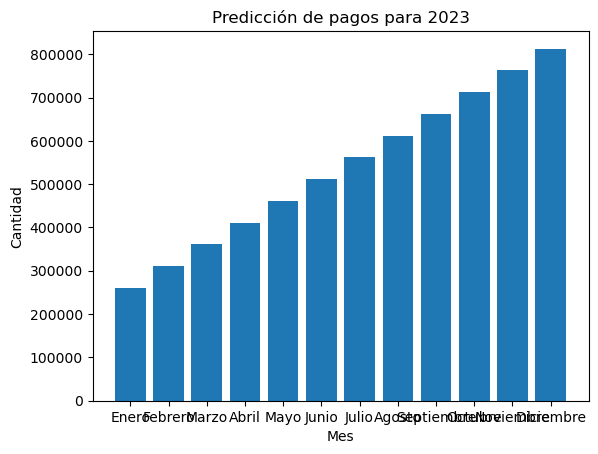

In [196]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots()

# Configurar el estilo del gráfico
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad")
ax.set_title("Predicción de pagos para 2023")

# Obtener los datos para el eje x (meses)
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Obtener los datos para el eje y (predicciones)
predicciones = predictions_rounded

# Crear el gráfico de barras
ax.bar(meses, predicciones)

# Mostrar el gráfico
plt.show()


In [141]:
y_train

0      26267.62
1     144384.36
2     199704.48
3     136313.92
4     159881.97
5     180218.98
6     158247.00
7     246204.86
8     161206.23
9     316857.96
10    694292.68
11    826637.64
12    234152.13
13    106652.01
14    404603.21
15    173245.96
16    208524.42
17    185842.86
18    284191.48
19    378094.30
20    476445.53
21    185103.43
22    857187.30
23    819285.62
Name: amount, dtype: float64

In [142]:
(826637.64 + 819285.62) / 2

822961.63

In [143]:
predictions

array([260546.21490383, 310743.10537586, 360939.99584788, 411136.88631991,
       461333.77679196, 511530.66726398, 561727.55773601, 611924.44820803,
       662121.33868006, 712318.22915208, 762515.11962411, 812712.01009613])

In [197]:
X_test

,year,month
0,2023,1
1,2023,2
2,2023,3
3,2023,4
4,2023,5
5,2023,6
6,2023,7
7,2023,8
8,2023,9
9,2023,10


In [199]:

df = pd.read_csv('csvs/payments2.csv')

# Crea un archivo Excel para trabajar en power bi
nombre_archivo_excel = 'xlsx/payments2.xlsx'
df.to_excel(nombre_archivo_excel, index=False)

In [200]:
# Crear los datos para la tabla
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
previsto = [260546, 310743, 360940, 411137, 461334, 511531, 561728, 611924, 662121, 712318, 762515, 812712]

# Crear un DataFrame con los datos
data = {'Mes': meses, 'Previsto': previsto}
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo Excel
df.to_excel('xlsx/predicción.xlsx', index=False)


In [201]:


# Cargar el archivo Excel existente
df = pd.read_excel('xlsx/predicción.xlsx')

# Cambiar el nombre de la columna "Previsto" a "Year"
df = df.rename(columns={'Previsto': 'year'})

# Guardar el DataFrame actualizado en un nuevo archivo Excel
df.to_excel('xlsx/predicción.xlsx', index=False)


In [202]:
import pandas as pd

# Crear los datos para la tabla
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
previsto = [262458, 295987, 360939, 450021, 392563, 495214, 623459, 536236, 564236, 852369, 824123, 795236]

# Crear un DataFrame con los datos
data = {'Mes': meses, 'Previsto': previsto}
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo Excel
df.to_excel('xlsx/Facturacion.xlsx', index=False)


In [203]:
# Cargar el archivo Excel existente
df = pd.read_excel('xlsx/Facturacion.xlsx')

# Cambiar el nombre de la columna "Previsto" a "Year"
df = df.rename(columns={'Previsto': 'year'})

# Guardar el DataFrame actualizado en un nuevo archivo Excel
df.to_excel('xlsx/Facturacion.xlsx', index=False)


In [204]:
import pandas as pd

# Cargar los datos del primer archivo
df_predicho = pd.read_excel('xlsx/predicción.xlsx')

# Cargar los datos del segundo archivo
df_facturacion = pd.read_excel('xlsx/Facturacion.xlsx')

# Calcular la diferencia porcentual
df_comparacion = df_facturacion.copy()
df_comparacion['Diferencia'] = ((df_facturacion['year'] - df_predicho['year']) / df_predicho['year']) * 100

# Guardar el DataFrame de comparación en un nuevo archivo Excel
df_comparacion.to_excel('xlsx/comparacion.xlsx', index=False)

